In [1]:
# first we need to import the libraries we're going to use
# 'import x as y' will import package x but give it the alias 'y' so you don't have to type out x all the time

import matplotlib.pyplot as plt # for making nice plots
import pandas as pd # for handling and transforming the data
import datetime # for manipulating dates, timestamps etc

%matplotlib inline

In [2]:
# we'll be using this file from now on! It's been through the process of cleaning and preparing
df = pd.read_csv("../data/cleaned.csv")

In [3]:
df.head(5)

,reference_num,latitude,longitude,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_severity,casualty_sex,casualty_age,vehicle_type
0,202609,53.891468,-1.667699,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,30,Car
1,202609,53.891468,-1.667699,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Female,20,Car
2,810209,53.933915,-1.374070,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,29,Car
3,972109,53.911349,-1.384957,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,17,Car
4,972109,53.911349,-1.384957,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,53,Goods vehicle 3.5 tonnes mgw and under


### Part 2a - removing unrelated columns

In [4]:
# we know ahead of time that there are a few columns that definitely won't be useful for classification
# at least not without extra information. One of these is the reference number. Any others?

useless_columns = ['latitude', 'longitude', 'reference_num']

df = df.drop(columns=useless_columns)
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_severity,casualty_sex,casualty_age,vehicle_type
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,30,Car
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Female,20,Car
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,29,Car
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,17,Car
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,53,Goods vehicle 3.5 tonnes mgw and under


In [5]:
# we have a range of different columns left
# some are numerical, some are date/time-related, some are categorical, and some are binary

### Part 2b - exploring binary columns

In [6]:
# some of our columns are binary, in that they only ever have one of two values. 
# what are these columns?
binary_columns = ['casualty_sex', 'casualty_severity']

In [7]:
# let's look at a binary column - casualty sex. Does it matter? What can we tell from this data?

df.groupby(['casualty_severity', 'casualty_sex']).size()

# hint: men are the casualty in 58% of slight accidents but 70% of serious accidents
# this could be useful information!

casualty_severity  casualty_sex
Serious            Female           655
                   Male            1537
Slight             Female          7038
                   Male            9653
dtype: int64

In [8]:
# as our columns are binary we can encode them using 0 and 1 instead of string labels - much easier to handle later!

# write a function will return 1 if our value matches the specified 'positive' value
# e.g. encodeBinary('Male', 'Female') = 0, encodeBinary('Serious', 'Serious') = 1
def encodeBinary(positiveValue, value):
    return int(value == positiveValue)



In [9]:
# we can now apply this function to get new binary columns
df['is_male'] = [encodeBinary('Male', s) for s in df.casualty_sex]
df['is_serious'] = [encodeBinary('Serious', s) for s in df.casualty_severity]

# we can drop the old columns, now we have the binary versions
df = df.drop(columns = binary_columns)

In [10]:
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0


### Part 2c - exploring numerical columns

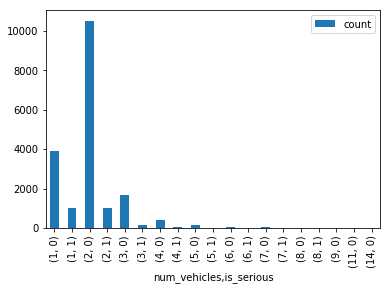

In [11]:
# numerical columns - are they useful? Do we want to do anything with them?

# these are the numerical columns in our dataset
# choose one and have a look at the distribution of values
# extra points: break these down by slight/serious
numericalColumns = ['num_vehicles', 'casualty_age']

# e.g.
severity_by_num_vehicles = df.groupby(['num_vehicles', 'is_serious'])['is_serious'].agg(['count'])
severity_by_num_vehicles.plot.bar()

# hint: plt.hist(values) will give a histogram of a list of values
# hint: df.groupby(['columnsToGroupBy'])['otherColumnsToMeasureAgainst'].agg(['count', 'sum', etc])

In [12]:
# in this case, these columns are fine as they are and we don't want to normalise or modify them, so let's carry on!

### Part 2d - exploring datetime columns

In [13]:
# in their current format, fields like accident_date aren't very useful - we want to extract useful columns

monthMap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 
            'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# write a function to take a date string of format DD-Mon-YY and extract the month as an integer
def getMonth(s):
    return monthMap[s.split('-')[1]]

# write a function to take a date string of format DD-Mon-YY and extract the full year as an integer
def getYear(s):
    return 2000 + int(s.split('-')[2])

# use these functions to add new columns to our dataframe
df['month'] = [getMonth(s) for s in df['accident_date']]
df['year'] = [getYear(s) for s in df['accident_date']]

df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious,month,year
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0,3,2009
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0,3,2009
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0,10,2009
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0,11,2009
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0,11,2009


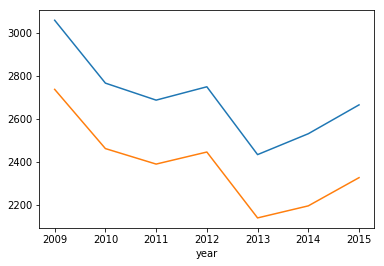

In [14]:
# does the year matter? let's have a look at the distribution of slight vs serious cases by year

allByYear = df.groupby('year')['year'].count()
slightByYear = df[df.is_serious == 0].groupby('year')['year'].count()
allByYear.plot()
slightByYear.plot()

# answer: year is probably not a good indicator of slight/serious, same for month, so let's drop these

df = df.drop(columns=['year', 'month'])

In [15]:
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0


In [16]:
# what about weekday? we can get this information!

dayMap = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

def getWeekday(s):
    month = getMonth(s)
    year = getYear(s)
    date = int(s.split('-')[0])
    dt = datetime.datetime(year, month, date)
    return dayMap[dt.isoweekday()]

df['weekday'] = [getWeekday(s) for s in df['accident_date']]

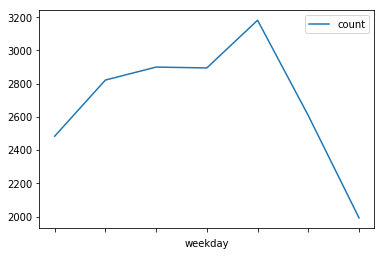

In [17]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
allByDay = df.groupby('weekday')['weekday'].agg(['count'])

allByDay.loc[day_order].plot()

In [18]:
# that's enough datetime business - let's drop the original columns and carry on
df = df.drop(columns = ['accident_date', 'accident_time'])

### Part 2e - exploring categorical columns

In [19]:
# categorical columns

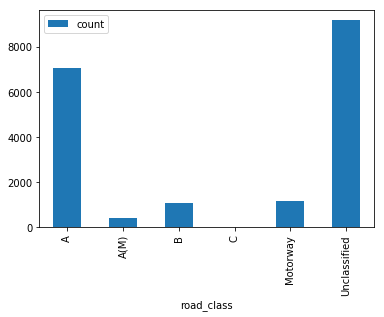

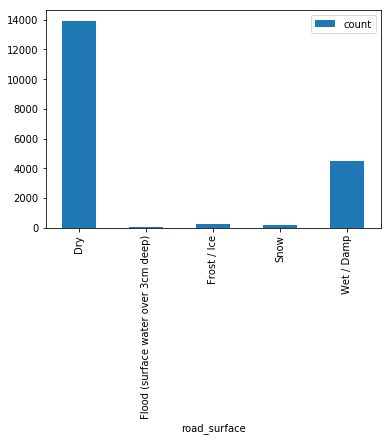

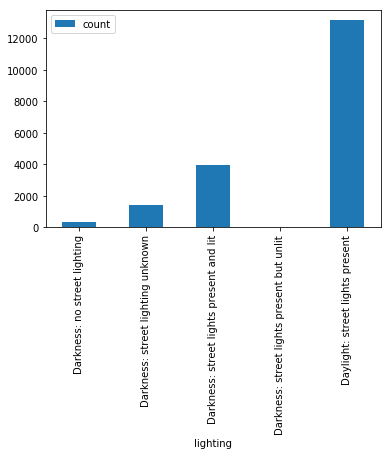

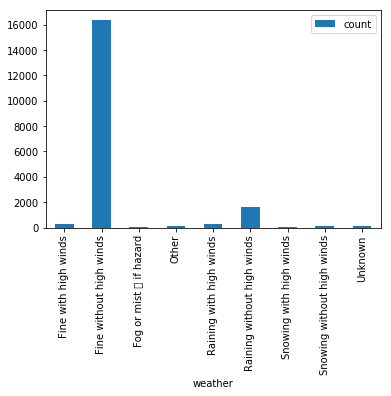

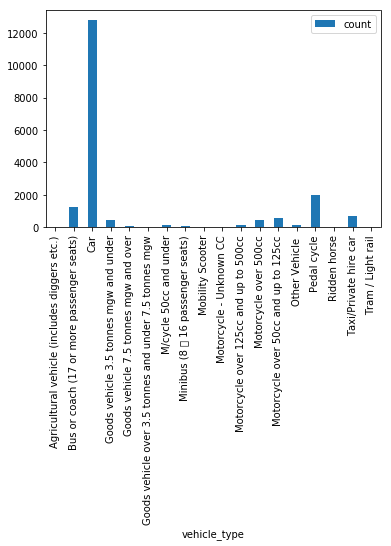

In [20]:
colsToExplore = ['road_class', 'road_surface', 'lighting', 'weather', 'vehicle_type']

for colte in colsToExplore:
    countByRoadClass = df.groupby(colte)[colte].agg(['count'])
    countByRoadClass.plot.bar()

In [21]:
def one_hot_encode_value(value, target):
    return int(value == target)

def pythonify(category_name, field_name):
    return category_name + '_is_' + field_name.lower().replace(' ','_')

def one_hot_encode_column(df, column_name, options):
    for option in options:
        new_column = pythonify(column_name, option)
        df[new_column] = [one_hot_encode_value(s, option) for s in df[column_name]]
    return df

In [22]:
# road surface - want to replace with binary is_dry

def encode_surface(s):
    return int(s == 'Dry')

df['is_dry'] = [encode_surface(s) for s in df.road_surface]
df = df.drop(columns = ['road_surface'])
df.head(10)

,num_vehicles,road_class,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious,weekday,is_dry
0,2,Unclassified,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0,Sat,1
1,2,Unclassified,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0,Sat,1
2,1,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0,Sat,1
3,4,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0,Thu,1
4,4,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0,Thu,1
5,1,Motorway,Darkness: no street lighting,Fine with high winds,Driver/Rider,39,Goods vehicle 3.5 tonnes mgw and under,1,0,Mon,1
6,2,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,60,Goods vehicle 7.5 tonnes mgw and over,1,1,Tue,0
7,2,A(M),Darkness: no street lighting,Fine with high winds,Driver/Rider,41,Goods vehicle 7.5 tonnes mgw and over,1,1,Tue,0
8,1,Unclassified,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,18,Car,1,0,Sat,1
9,2,Unclassified,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,31,Pedal cycle,1,0,Mon,1


In [23]:
# want to one hot encode road class

df = one_hot_encode_column(df, 'road_class', set(df.road_class.values))
df = df.drop(columns = ['road_class'])
df.head(10)

,num_vehicles,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious,weekday,is_dry,road_class_is_c,road_class_is_unclassified,road_class_is_a(m),road_class_is_b,road_class_is_motorway,road_class_is_a
0,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0,Sat,1,0,1,0,0,0,0
1,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0,Sat,1,0,1,0,0,0,0
2,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0,Sat,1,0,0,1,0,0,0
3,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0,Thu,1,0,0,1,0,0,0
4,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0,Thu,1,0,0,1,0,0,0
5,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,39,Goods vehicle 3.5 tonnes mgw and under,1,0,Mon,1,0,0,0,0,1,0
6,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,60,Goods vehicle 7.5 tonnes mgw and over,1,1,Tue,0,0,0,1,0,0,0
7,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,41,Goods vehicle 7.5 tonnes mgw and over,1,1,Tue,0,0,0,1,0,0,0
8,1,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,18,Car,1,0,Sat,1,0,1,0,0,0,0
9,2,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,31,Pedal cycle,1,0,Mon,1,0,1,0,0,0,0


In [24]:
# vehicle type - lots of options, don't want to hot encode them all
# most common = Car, Pedal Cycle, Bus or coach, other

def encode_vehicle_as_string(s):
    if s == 'Car':
        return s
    elif s == 'Pedal cycle':
        return s
    elif s == 'Bus or coach (17 or more passenger seats)':
        return 'Bus or coach'
    else:
        return 'Other'
    
df['vehicle_type_reduced'] = [encode_vehicle_as_string(s) for s in df.vehicle_type]
df = one_hot_encode_column(df, 'vehicle_type_reduced', set(df.vehicle_type_reduced.values))
df = df.drop(columns = ['vehicle_type', 'vehicle_type_reduced'])
df.head(10)

,num_vehicles,lighting,weather,casualty_class,casualty_age,is_male,is_serious,weekday,is_dry,road_class_is_c,road_class_is_unclassified,road_class_is_a(m),road_class_is_b,road_class_is_motorway,road_class_is_a,vehicle_type_reduced_is_pedal_cycle,vehicle_type_reduced_is_other,vehicle_type_reduced_is_car,vehicle_type_reduced_is_bus_or_coach
0,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,1,0,Sat,1,0,1,0,0,0,0,0,0,1,0
1,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,0,0,Sat,1,0,1,0,0,0,0,0,0,1,0
2,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,1,0,Sat,1,0,0,1,0,0,0,0,0,1,0
3,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,1,0,Thu,1,0,0,1,0,0,0,0,0,1,0
4,4,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,1,0,Thu,1,0,0,1,0,0,0,0,1,0,0
5,1,Darkness: no street lighting,Fine with high winds,Driver/Rider,39,1,0,Mon,1,0,0,0,0,1,0,0,1,0,0
6,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,60,1,1,Tue,0,0,0,1,0,0,0,0,1,0,0
7,2,Darkness: no street lighting,Fine with high winds,Driver/Rider,41,1,1,Tue,0,0,0,1,0,0,0,0,1,0,0
8,1,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,18,1,0,Sat,1,0,1,0,0,0,0,0,0,1,0
9,2,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,31,1,0,Mon,1,0,1,0,0,0,0,1,0,0,0


In [25]:
# also want to one hot encode lighting

df = one_hot_encode_column(df, 'lighting', set(df.lighting.values))
df = df.drop(columns = ['lighting'])
df.head(10)

,num_vehicles,weather,casualty_class,casualty_age,is_male,is_serious,weekday,is_dry,road_class_is_c,road_class_is_unclassified,...,road_class_is_a,vehicle_type_reduced_is_pedal_cycle,vehicle_type_reduced_is_other,vehicle_type_reduced_is_car,vehicle_type_reduced_is_bus_or_coach,lighting_is_daylight:_street_lights_present,lighting_is_darkness:_street_lights_present_but_unlit,lighting_is_darkness:_no_street_lighting,lighting_is_darkness:_street_lighting_unknown,lighting_is_darkness:_street_lights_present_and_lit
0,2,Fine with high winds,Driver/Rider,30,1,0,Sat,1,0,1,...,0,0,0,1,0,0,0,1,0,0
1,2,Fine with high winds,Driver/Rider,20,0,0,Sat,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,Fine with high winds,Driver/Rider,29,1,0,Sat,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,Fine with high winds,Driver/Rider,17,1,0,Thu,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4,Fine with high winds,Driver/Rider,53,1,0,Thu,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,1,Fine with high winds,Driver/Rider,39,1,0,Mon,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6,2,Fine with high winds,Driver/Rider,60,1,1,Tue,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,2,Fine with high winds,Driver/Rider,41,1,1,Tue,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8,1,Fine with high winds,Driver/Rider,18,1,0,Sat,1,0,1,...,0,0,0,1,0,0,0,0,1,0
9,2,Fine with high winds,Driver/Rider,31,1,0,Mon,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [26]:
# and casualty class and weekday from earlier!

df = one_hot_encode_column(df, 'casualty_class', set(df.casualty_class.values))
df = one_hot_encode_column(df, 'weekday', set(df.weekday.values))

df = df.drop(columns=['casualty_class', 'weekday'])
df.head(10)

,num_vehicles,weather,casualty_age,is_male,is_serious,is_dry,road_class_is_c,road_class_is_unclassified,road_class_is_a(m),road_class_is_b,...,casualty_class_is_driver/rider,casualty_class_is_passenger,casualty_class_is_pedestrian,weekday_is_sat,weekday_is_tue,weekday_is_sun,weekday_is_wed,weekday_is_mon,weekday_is_thu,weekday_is_fri
0,2,Fine with high winds,30,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,2,Fine with high winds,20,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,Fine with high winds,29,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,4,Fine with high winds,17,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,4,Fine with high winds,53,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
5,1,Fine with high winds,39,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,2,Fine with high winds,60,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7,2,Fine with high winds,41,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
8,1,Fine with high winds,18,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
9,2,Fine with high winds,31,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [30]:
# finally, let's look at weather a bit more carefully
# there are quite a lot of options - maybe we could simplify this a bit?

# let's try to group by weather and severity
severity_by_weather = df.groupby(['weather', 'is_serious'])['weather'].agg(['count'])

# what are all the possible options that weather can take?
weather_options = set(df.weather.values)

x = []
y = []

for weather_type in weather_options:
    x.append(weather_type)
    subDf = severity_by_weather.loc[weather_type]
    slight = subDf.iloc[0]['count']
    serious = subDf.iloc[1]['count']
    y.append(serious/(slight+serious))

Text(0,0.5,'Serious/total')

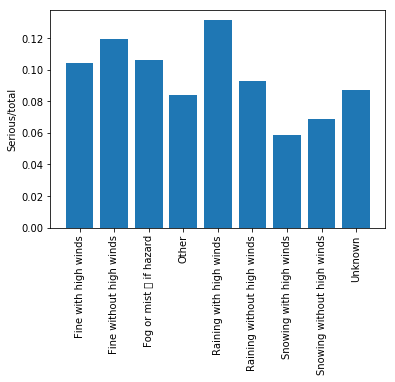

In [31]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel('Serious/total')

In [32]:
# quite a lot of variation, not really tied to fine/raining or high winds
# so let's hot encode the lot and move on to the exciting stuff.

df = one_hot_encode_column(df, 'weather', set(df.weather.values))
df = df.drop(columns=['weather'])
df.head(10)

,num_vehicles,casualty_age,is_male,is_serious,is_dry,road_class_is_c,road_class_is_unclassified,road_class_is_a(m),road_class_is_b,road_class_is_motorway,...,weekday_is_fri,weather_is_snowing_with_high_winds,weather_is_fine_without_high_winds,weather_is_raining_with_high_winds,weather_is_raining_without_high_winds,weather_is_fog_or_mist__if_hazard,weather_is_unknown,weather_is_fine_with_high_winds,weather_is_other,weather_is_snowing_without_high_winds
0,2,30,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,20,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,29,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,17,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,53,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,39,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,2,60,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,2,41,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,18,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,2,31,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
